# Multiple Linear Regression

## Housing Case Study
Problem Statement:
Consider a real estate company that has a dataset containing the prices of properties in the Delhi region. It wishes to use the data to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.

Essentially, the company wants —

To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.

To create a linear model that quantitatively relates house prices with variables such as number of rooms, area, number of bathrooms, etc.

To know the accuracy of the model, i.e. how well these variables can predict house prices.

Reading and Understanding the Data
Let us first import NumPy and Pandas and read the housing dataset

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.api as sm
import numpy as np

In [3]:
#Read the data
housing = pd.read_csv("Housing.csv")
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
#check for missing values
housing.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

# Correlation Matrix

In [6]:
housing.corr() # All the indepenedent variables are not that much correlated with each other only area and bedroom has 0.5175 correlation value.

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


# Scatterplot between variables along with histograms

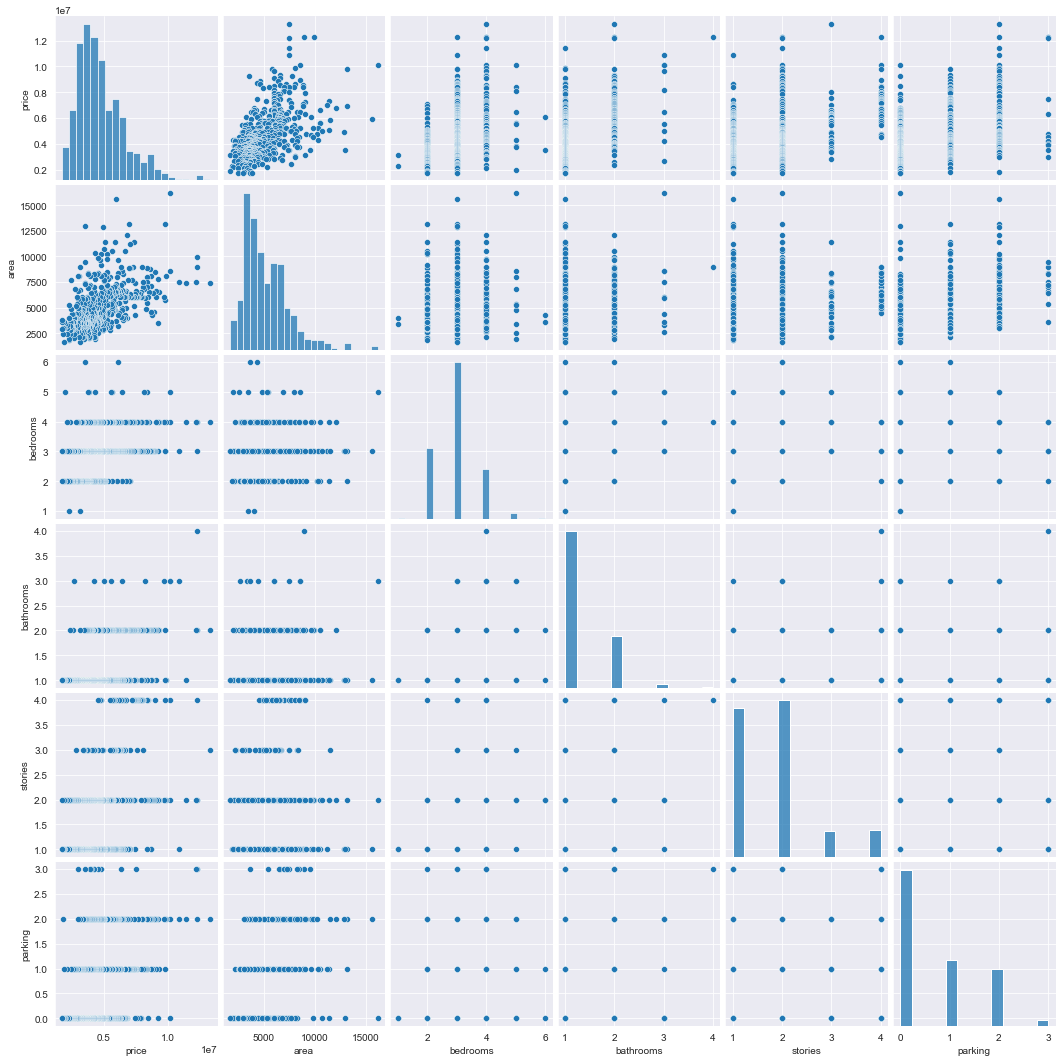

In [7]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(housing)

# Data Preparation
Many columns have values as 'Yes' or 'No'.

But in order to fit a regression line, we would need numerical values and not string. Hence, we need to convert them to 1s and 0s, where 1 is a 'Yes' and 0 is a 'No'.

In [8]:
# List of variables to map

varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)

In [9]:
# Check the housing dataframe now

housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


### Dummy Variables
The variable furnishingstatus has three levels. We need to convert these levels into integer as well.

For this, we will use dummy variables

In [10]:
# Get the dummy variables for the feature 'furnishingstatus' and store it in a new variable - 'status'
status = pd.get_dummies(housing['furnishingstatus'])

In [11]:
# Check what the dataset 'status' looks like
status.head()

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


In [12]:
# Let's drop the first column from status df using 'drop_first = True'

status = pd.get_dummies(housing['furnishingstatus'], drop_first = True)

In [13]:
# Add the results to the original housing dataframe

housing = pd.concat([housing, status], axis = 1)

In [14]:
# Now let's see the head of our dataframe.

housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [15]:
# Drop 'furnishingstatus' as we have created the dummies for it

housing.drop(['furnishingstatus'], axis = 1, inplace = True)

In [16]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


# Rescaling the Features

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler = MinMaxScaler()

In [19]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

housing[num_vars] = scaler.fit_transform(housing[num_vars])

In [20]:
Y=housing.iloc[:,0] # Target Variable

In [21]:
Y.head()

0    1.000000
1    0.909091
2    0.909091
3    0.906061
4    0.836364
Name: price, dtype: float64

In [22]:
X=housing.iloc[:,1:14]

In [23]:
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,0.396564,0.6,0.333333,0.666667,1,0,0,0,1,0.666667,1,0,0
1,0.502405,0.6,1.000000,1.000000,1,0,0,0,1,1.000000,0,0,0
2,0.571134,0.4,0.333333,0.333333,1,0,1,0,0,0.666667,1,1,0
3,0.402062,0.6,0.333333,0.333333,1,0,1,0,1,1.000000,1,0,0
4,0.396564,0.6,0.000000,0.333333,1,1,1,0,1,0.666667,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,0.092784,0.2,0.000000,0.000000,1,0,1,0,0,0.666667,0,0,1
541,0.051546,0.4,0.000000,0.000000,0,0,0,0,0,0.000000,0,1,0
542,0.135395,0.2,0.000000,0.000000,1,0,0,0,0,0.000000,0,0,1
543,0.086598,0.4,0.000000,0.000000,0,0,0,0,0,0.000000,0,0,0


### Splitting the Data into Training and Testing Sets

In [24]:
from sklearn.model_selection import train_test_split
np.random.seed(0)

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=100)

In [25]:
X_train

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.134021,0.4,0.000000,0.000000,1,0,0,0,0,0.333333,0,0,1
19,0.327835,0.4,0.333333,0.333333,1,0,0,0,1,0.333333,1,1,0
159,0.103093,0.4,0.333333,0.000000,1,1,1,0,1,0.000000,0,0,0
35,0.367698,0.4,0.333333,1.000000,1,0,0,0,1,0.666667,0,0,0
28,0.432990,0.8,0.333333,0.333333,1,0,1,1,0,0.666667,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,0.105155,0.2,0.000000,0.000000,1,0,0,0,0,0.000000,0,0,1
53,0.240550,0.4,0.333333,1.000000,1,0,0,0,1,0.666667,0,1,0
350,0.121649,0.2,0.000000,0.333333,1,0,0,1,0,0.333333,0,1,0
79,0.298969,0.4,0.333333,0.666667,1,1,0,0,1,0.000000,0,0,0


In [26]:
X_test

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
265,0.084536,0.4,0.000000,0.333333,1,0,0,0,0,0.000000,1,1,0
54,0.298969,0.4,0.333333,0.333333,1,1,0,0,1,0.333333,0,1,0
171,0.592371,0.4,0.000000,0.000000,1,0,0,0,0,0.333333,1,1,0
244,0.252234,0.4,0.000000,0.333333,1,1,1,0,0,0.000000,1,1,0
268,0.226804,0.6,0.000000,0.333333,1,0,0,0,1,0.000000,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0.020619,0.4,0.333333,0.333333,1,0,1,0,0,0.000000,1,0,1
191,0.621993,0.4,0.000000,0.333333,1,1,1,0,0,0.000000,0,1,0
310,0.297938,0.4,0.000000,0.000000,1,0,1,0,0,0.000000,0,1,0
46,0.298969,0.4,0.333333,1.000000,1,0,0,0,1,0.333333,0,0,0


In [27]:
y_train

359    0.169697
19     0.615152
159    0.321212
35     0.548133
28     0.575758
         ...   
526    0.048485
53     0.484848
350    0.175758
79     0.424242
520    0.060606
Name: price, Length: 381, dtype: float64

In [28]:
y_test

265    0.229697
54     0.484848
171    0.303030
244    0.242424
268    0.227879
         ...   
413    0.145455
191    0.284848
310    0.206061
46     0.500000
50     0.490909
Name: price, Length: 164, dtype: float64

# Preparing a model

In [29]:
#Build model
import statsmodels.api as sm
# Add a constant
X_train_lm = sm.add_constant(X_train)
model1 = sm.OLS(y_train, X_train_lm).fit()
print(model1.summary())  

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     60.40
Date:                Sat, 16 Jan 2021   Prob (F-statistic):           8.83e-83
Time:                        18:43:10   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -735.6
Df Residuals:                     367   BIC:                            -680.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0162      0.021     

In [30]:
#from sklearn import metrics
#print(metrics.mean_squared_error(y_test, y_pred))

In [31]:
#print(metrics.r2_score(y_test, y_pred))

####The p value of bedrooms and semi-furnished are greater than 0.05 so we reject the null hypothesis and we have to check these variables further. ###

# Simple Linear Regression Models

In [32]:
ml_bedrooms=sm.OLS(y_train,X_train["bedrooms"]).fit()  
print(ml_bedrooms.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.747
Model:                            OLS   Adj. R-squared (uncentered):              0.746
Method:                 Least Squares   F-statistic:                              1120.
Date:                Sat, 16 Jan 2021   Prob (F-statistic):                   2.28e-115
Time:                        18:43:10   Log-Likelihood:                          174.39
No. Observations:                 381   AIC:                                     -346.8
Df Residuals:                     380   BIC:                                     -342.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [33]:
ml_semi=sm.OLS(y_train,X_train["semi-furnished"]).fit()  
print(ml_semi.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.339
Model:                            OLS   Adj. R-squared (uncentered):              0.337
Method:                 Least Squares   F-statistic:                              195.0
Date:                Sat, 16 Jan 2021   Prob (F-statistic):                    4.69e-36
Time:                        18:43:10   Log-Likelihood:                         -8.3278
No. Observations:                 381   AIC:                                      18.66
Df Residuals:                     380   BIC:                                      22.60
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [34]:
ml_semi_bed=sm.OLS(y_train,X_train.iloc[:,[1,11]]).fit()  
print(ml_semi_bed.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.751
Model:                            OLS   Adj. R-squared (uncentered):              0.750
Method:                 Least Squares   F-statistic:                              571.1
Date:                Sat, 16 Jan 2021   Prob (F-statistic):                   4.22e-115
Time:                        18:43:10   Log-Likelihood:                          177.53
No. Observations:                 381   AIC:                                     -351.1
Df Residuals:                     379   BIC:                                     -343.2
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [35]:
## When we build the model on bedrooms and semifurnished individually we came to know that bedrooms is significant and semi-furnished variable is insignificant.

# Calculating VIF

Checking VIF
The formula for calculating VIF is:

𝑉𝐼𝐹𝑖=1/1−𝑅𝑖2 

In [36]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [37]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,bedrooms,7.55
4,mainroad,5.91
0,area,4.64
3,stories,2.75
11,semi-furnished,2.24
6,basement,2.01
9,parking,2.00
12,unfurnished,1.87
8,airconditioning,1.76
2,bathrooms,1.69


In [38]:
## So VIF value is not that much for any features so on the basis of probablity we know that semi-furnished feature is not that significant so we can ignore it.

In [39]:
# Dropping highly correlated variables and insignificant variables

X_train = X_train.drop('semi-furnished', 1,)

In [40]:
X_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,unfurnished
359,0.134021,0.4,0.000000,0.000000,1,0,0,0,0,0.333333,0,1
19,0.327835,0.4,0.333333,0.333333,1,0,0,0,1,0.333333,1,0
159,0.103093,0.4,0.333333,0.000000,1,1,1,0,1,0.000000,0,0
35,0.367698,0.4,0.333333,1.000000,1,0,0,0,1,0.666667,0,0
28,0.432990,0.8,0.333333,0.333333,1,0,1,1,0,0.666667,0,1


In [41]:
#Build the model after dropping the semi-furnished feature
import statsmodels.api as sm
# Add a constant
X_train_lm = sm.add_constant(X_train)
model2 = sm.OLS(y_train, X_train_lm).fit()
print(model2.summary())  

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     65.61
Date:                Sat, 16 Jan 2021   Prob (F-statistic):           1.07e-83
Time:                        18:43:10   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -737.6
Df Residuals:                     368   BIC:                            -686.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0169      0.019     

In [42]:
#Basement and bedrooms features have the greater p values, so now do the analysis for them and check whether they are significant or not.

In [43]:
ml2_bedrooms=sm.OLS(y_train,X_train["bedrooms"]).fit()  
print(ml2_bedrooms.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.747
Model:                            OLS   Adj. R-squared (uncentered):              0.746
Method:                 Least Squares   F-statistic:                              1120.
Date:                Sat, 16 Jan 2021   Prob (F-statistic):                   2.28e-115
Time:                        18:43:10   Log-Likelihood:                          174.39
No. Observations:                 381   AIC:                                     -346.8
Df Residuals:                     380   BIC:                                     -342.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [44]:
#the p value is very less than 0.05 so when we run the model only on bedrroms it is acting as a significant feature.

In [45]:
ml2_basement=sm.OLS(y_train,X_train["basement"]).fit()  
print(ml2_basement.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.349
Model:                            OLS   Adj. R-squared (uncentered):              0.348
Method:                 Least Squares   F-statistic:                              204.1
Date:                Sat, 16 Jan 2021   Prob (F-statistic):                    2.31e-37
Time:                        18:43:10   Log-Likelihood:                         -5.3236
No. Observations:                 381   AIC:                                      12.65
Df Residuals:                     380   BIC:                                      16.59
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [46]:
#the p value is very less than 0.05 so when we run the model only on basement it is acting as a significant feature.

In [47]:
ml2_bb=sm.OLS(y_train,X_train.iloc[:,[1,6]]).fit()  
print(ml2_bb.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.757
Model:                            OLS   Adj. R-squared (uncentered):              0.756
Method:                 Least Squares   F-statistic:                              590.7
Date:                Sat, 16 Jan 2021   Prob (F-statistic):                   3.45e-117
Time:                        18:43:10   Log-Likelihood:                          182.36
No. Observations:                 381   AIC:                                     -360.7
Df Residuals:                     379   BIC:                                     -352.8
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [48]:
#the p value is very less than 0.05 when we run the model only on basement and bedrooms, they are acting as a significant features.

In [49]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,bedrooms,6.63
4,mainroad,5.75
0,area,5.01
3,stories,2.69
9,parking,2.12
6,basement,2.01
8,airconditioning,1.77
2,bathrooms,1.67
10,prefarea,1.50
5,guestroom,1.47


Dropping the Variable and Updating the Model
The variable bedroom has a significantly high VIF (6.6) and a high p-value (0.206) as well. Hence, this variable isn't of much use and should be dropped.

In [50]:
X_train = X_train.drop('bedrooms', 1,)

In [51]:
#Build the model after dropping the bedrooms feature
import statsmodels.api as sm
# Add a constant
X_train_lm = sm.add_constant(X_train)
model3 = sm.OLS(y_train, X_train_lm).fit()
print(model3.summary())  

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     71.31
Date:                Sat, 16 Jan 2021   Prob (F-statistic):           2.73e-84
Time:                        18:43:10   Log-Likelihood:                 380.96
No. Observations:                 381   AIC:                            -737.9
Df Residuals:                     369   BIC:                            -690.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0319      0.015     

In [52]:
# Now all the p-values are less than 0.05 so the features are significant

In [53]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,mainroad,4.92
0,area,4.84
2,stories,2.23
8,parking,2.10
5,basement,1.87
7,airconditioning,1.77
1,bathrooms,1.61
9,prefarea,1.50
4,guestroom,1.46
10,unfurnished,1.33


# Residual Analysis

## Test for Normality of Residuals (Q-Q Plot)

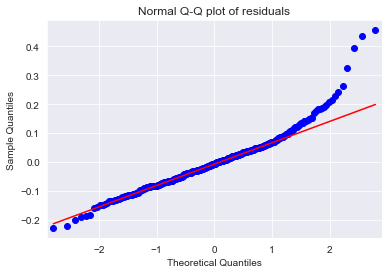

In [54]:
import statsmodels.api as sm
qqplot=sm.qqplot(model3.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [55]:
list(np.where(model3.resid>0.2))

[array([ 69,  84, 101, 188, 224, 331, 344, 360, 366], dtype=int64)]

## Residual Plot for Homoscedasticity

In [56]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

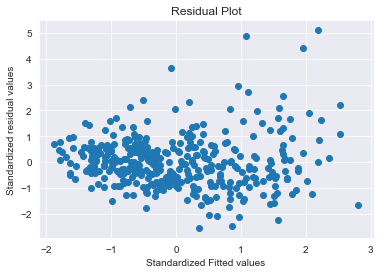

In [57]:
plt.scatter(get_standardized_values(model3.fittedvalues),
            get_standardized_values(model3.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

# Model Deletion Diagnostics

## Detecting Influencers/Outliers

## Cook’s Distance

In [58]:
model_influence = model3.get_influence()
(c, _) = model_influence.cooks_distance

In [59]:
c

array([5.82281514e-04, 6.98295134e-03, 4.25608058e-05, 3.49047363e-04,
       1.09280697e-02, 4.46122553e-05, 3.43601864e-03, 3.55343815e-06,
       4.86793311e-03, 1.94358967e-04, 1.07727270e-03, 1.04351612e-03,
       9.43269054e-03, 3.00489872e-05, 6.79557016e-03, 2.79983971e-02,
       2.32817023e-08, 1.59377034e-02, 1.81848436e-03, 8.70714821e-06,
       9.90041112e-04, 1.97559682e-04, 3.60727668e-03, 1.08753486e-03,
       9.24601110e-04, 1.04769674e-03, 1.95699520e-04, 1.06971114e-06,
       3.18096515e-03, 1.24323268e-03, 5.83006673e-04, 1.08366356e-02,
       1.44825982e-05, 9.01031656e-04, 1.83110611e-03, 3.94075881e-05,
       3.58294008e-04, 2.02903156e-03, 3.04059749e-04, 2.58730731e-04,
       1.96012790e-05, 6.61297286e-04, 3.04687966e-02, 4.76285128e-05,
       1.51241386e-03, 9.33071358e-04, 4.72615077e-05, 4.12588352e-04,
       3.30160433e-05, 1.25101759e-03, 4.45268843e-04, 3.02739041e-03,
       9.44762093e-06, 1.24440985e-03, 1.73218327e-03, 3.35828869e-04,
      

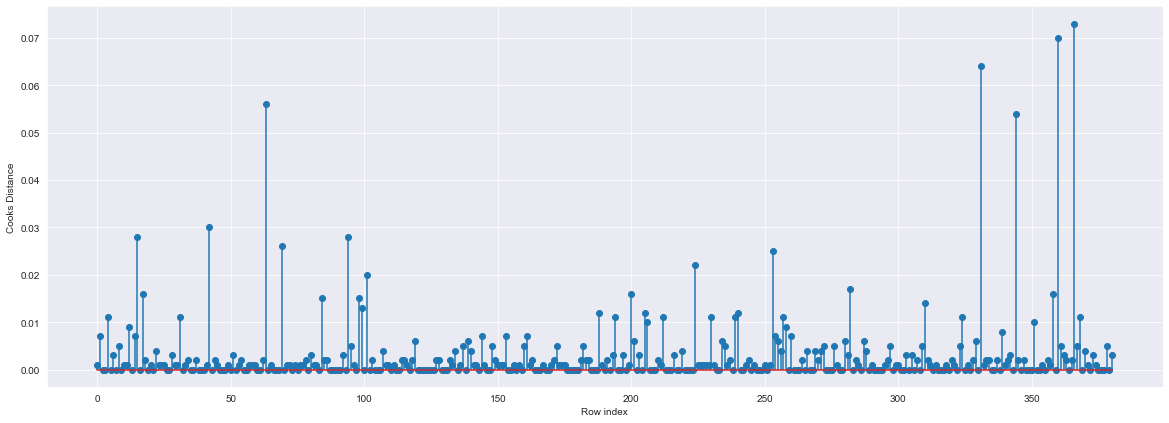

In [60]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(X_train)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [61]:
#index and value of influencer where c is more than 0.5
(np.argmax(c),np.max(c))

(366, 0.07256457721540178)

#The cook's distance for all the data is less than 0.5 so the data's are not influenctial or has outliers on the basis of cooks distance

## High Influence points

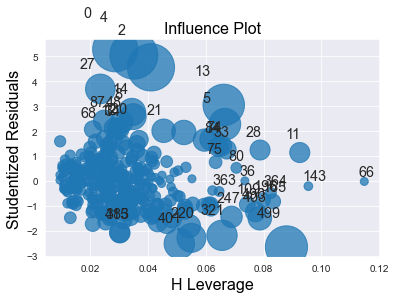

In [62]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model3)
plt.show()

In [63]:
k = X_train.shape[1]
n = X_train.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.09448818897637795

#### From the above plot, it is evident that data point 11 and 143, 66 are the influencers

In [64]:
X_train[X_train.index.isin([11,66, 143])]

,area,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,unfurnished
11,0.298969,0.666667,0.333333,1,1,1,1,0,0.666667,0,0
143,0.216495,0.333333,0.666667,0,0,1,1,0,0.000000,0,1
66,0.793814,0.000000,0.000000,1,0,1,1,0,0.333333,0,0


In [65]:
#See the differences
X_train.head()

,area,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,unfurnished
359,0.134021,0.000000,0.000000,1,0,0,0,0,0.333333,0,1
19,0.327835,0.333333,0.333333,1,0,0,0,1,0.333333,1,0
159,0.103093,0.333333,0.000000,1,1,1,0,1,0.000000,0,0
35,0.367698,0.333333,1.000000,1,0,0,0,1,0.666667,0,0
28,0.432990,0.333333,0.333333,1,0,1,1,0,0.666667,0,1


# Improving the model

In [66]:
#Load the data
X_train

,area,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,unfurnished
359,0.134021,0.000000,0.000000,1,0,0,0,0,0.333333,0,1
19,0.327835,0.333333,0.333333,1,0,0,0,1,0.333333,1,0
159,0.103093,0.333333,0.000000,1,1,1,0,1,0.000000,0,0
35,0.367698,0.333333,1.000000,1,0,0,0,1,0.666667,0,0
28,0.432990,0.333333,0.333333,1,0,1,1,0,0.666667,0,1
...,...,...,...,...,...,...,...,...,...,...,...
526,0.105155,0.000000,0.000000,1,0,0,0,0,0.000000,0,1
53,0.240550,0.333333,1.000000,1,0,0,0,1,0.666667,0,0
350,0.121649,0.000000,0.333333,1,0,0,1,0,0.333333,0,0
79,0.298969,0.333333,0.666667,1,1,0,0,1,0.000000,0,0


In [67]:
#Discard the data points which are influencers and reasign the row number (reset_index())
X_train1=X_train.drop(X_train.index[[11,66,143]],axis=0).reset_index()

In [68]:
y_train1=y_train.drop(y_train.index[[11,66,143]],axis=0).reset_index()

In [69]:
X_train1

,index,area,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,unfurnished
0,359,0.134021,0.000000,0.000000,1,0,0,0,0,0.333333,0,1
1,19,0.327835,0.333333,0.333333,1,0,0,0,1,0.333333,1,0
2,159,0.103093,0.333333,0.000000,1,1,1,0,1,0.000000,0,0
3,35,0.367698,0.333333,1.000000,1,0,0,0,1,0.666667,0,0
4,28,0.432990,0.333333,0.333333,1,0,1,1,0,0.666667,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
373,526,0.105155,0.000000,0.000000,1,0,0,0,0,0.000000,0,1
374,53,0.240550,0.333333,1.000000,1,0,0,0,1,0.666667,0,0
375,350,0.121649,0.000000,0.333333,1,0,0,1,0,0.333333,0,0
376,79,0.298969,0.333333,0.666667,1,1,0,0,1,0.000000,0,0


In [70]:
y_train1

,index,price
0,359,0.169697
1,19,0.615152
2,159,0.321212
3,35,0.548133
4,28,0.575758
...,...,...
373,526,0.048485
374,53,0.484848
375,350,0.175758
376,79,0.424242


In [71]:
#Drop the original index
X_train1=X_train1.drop(['index'],axis=1)

In [72]:
y_train1=y_train1.drop(['index'],axis=1)

In [73]:
y_train1

,price
0,0.169697
1,0.615152
2,0.321212
3,0.548133
4,0.575758
...,...
373,0.048485
374,0.484848
375,0.175758
376,0.424242


In [74]:
X_train1

,area,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,unfurnished
0,0.134021,0.000000,0.000000,1,0,0,0,0,0.333333,0,1
1,0.327835,0.333333,0.333333,1,0,0,0,1,0.333333,1,0
2,0.103093,0.333333,0.000000,1,1,1,0,1,0.000000,0,0
3,0.367698,0.333333,1.000000,1,0,0,0,1,0.666667,0,0
4,0.432990,0.333333,0.333333,1,0,1,1,0,0.666667,0,1
...,...,...,...,...,...,...,...,...,...,...,...
373,0.105155,0.000000,0.000000,1,0,0,0,0,0.000000,0,1
374,0.240550,0.333333,1.000000,1,0,0,0,1,0.666667,0,0
375,0.121649,0.000000,0.333333,1,0,0,1,0,0.333333,0,0
376,0.298969,0.333333,0.666667,1,1,0,0,1,0.000000,0,0


# Build Model

In [75]:
#Build the model after dropping the outliers
import statsmodels.api as sm
# Add a constant
X_train_lm1 = sm.add_constant(X_train1)
model4 = sm.OLS(y_train1, X_train_lm1).fit()
print(model4.summary())  

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     70.38
Date:                Sat, 16 Jan 2021   Prob (F-statistic):           2.70e-83
Time:                        18:43:12   Log-Likelihood:                 376.77
No. Observations:                 378   AIC:                            -729.5
Df Residuals:                     366   BIC:                            -682.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0314      0.015     

In [76]:
y_train_pred = model4.predict(X_train_lm1)

In [77]:
X_train_lm1

,const,area,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,unfurnished
0,1.0,0.134021,0.000000,0.000000,1,0,0,0,0,0.333333,0,1
1,1.0,0.327835,0.333333,0.333333,1,0,0,0,1,0.333333,1,0
2,1.0,0.103093,0.333333,0.000000,1,1,1,0,1,0.000000,0,0
3,1.0,0.367698,0.333333,1.000000,1,0,0,0,1,0.666667,0,0
4,1.0,0.432990,0.333333,0.333333,1,0,1,1,0,0.666667,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
373,1.0,0.105155,0.000000,0.000000,1,0,0,0,0,0.000000,0,1
374,1.0,0.240550,0.333333,1.000000,1,0,0,0,1,0.666667,0,0
375,1.0,0.121649,0.000000,0.333333,1,0,0,1,0,0.333333,0,0
376,1.0,0.298969,0.333333,0.666667,1,1,0,0,1,0.000000,0,0


In [78]:
y_train_pred

0      0.109995
1      0.463505
2      0.330918
3      0.515864
4      0.467861
         ...   
373    0.080216
374    0.478076
375    0.264479
376    0.444545
377    0.172541
Length: 378, dtype: float64

In [79]:
y_train1=y_train1.pop("price")

# Residual Analysis of the train data
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

Text(0.5, 0, 'Errors')

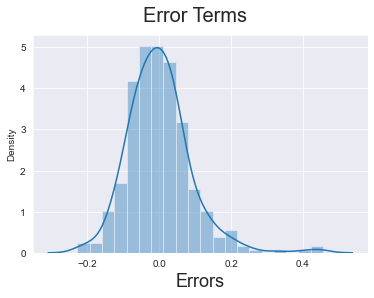

In [80]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train1 - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Predicting for new data

In [81]:
# Adding constant variable to test dataframe
X_test1 = sm.add_constant(X_test)

In [82]:
# Creating X_test_m4 dataframe by dropping variables from X_test

X_test2 = X_test1.drop(["bedrooms", "semi-furnished"], axis = 1)

In [83]:
X_test2

,const,area,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,unfurnished
265,1.0,0.084536,0.000000,0.333333,1,0,0,0,0,0.000000,1,0
54,1.0,0.298969,0.333333,0.333333,1,1,0,0,1,0.333333,0,0
171,1.0,0.592371,0.000000,0.000000,1,0,0,0,0,0.333333,1,0
244,1.0,0.252234,0.000000,0.333333,1,1,1,0,0,0.000000,1,0
268,1.0,0.226804,0.000000,0.333333,1,0,0,0,1,0.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1.0,0.020619,0.333333,0.333333,1,0,1,0,0,0.000000,1,1
191,1.0,0.621993,0.000000,0.333333,1,1,1,0,0,0.000000,0,0
310,1.0,0.297938,0.000000,0.000000,1,0,1,0,0,0.000000,0,0
46,1.0,0.298969,0.333333,1.000000,1,0,0,0,1,0.333333,0,0


In [84]:
# Making predictions using the fourth model

y_pred_test = model4.predict(X_test2)

In [85]:
y_pred_test

265    0.204650
54     0.426398
171    0.337429
244    0.308625
268    0.254693
         ...   
413    0.275307
191    0.359133
310    0.192623
46     0.474238
50     0.464058
Length: 164, dtype: float64

# Model Evaluation
Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred_test')

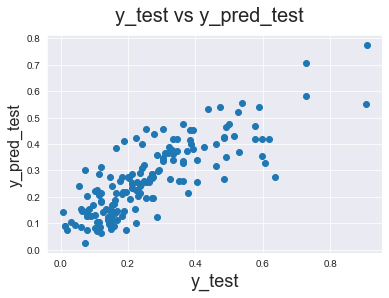

In [86]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_test)
fig.suptitle('y_test vs y_pred_test', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred_test', fontsize = 16)      

In [87]:
from sklearn import metrics
print(metrics.mean_squared_error(y_test, y_pred_test))

0.009675239838022372


In [88]:
print(metrics.r2_score(y_test, y_pred_test))

0.6712437100964579
